# PHYS3600ID Final Project

## Sections of this notebook

- #### Getting relevant data

- #### Visualizing Spectra

- #### Create a model to predict the total amount of mass in stars with a galaxy based on a spectra

- #### Create a model to predict the amount of cosmic dust in a galaxy based on a spectra

- #### Create a model to predict how long ago did the galaxy form its first stars based on a spectra

- #### Create a model to predict the speed of the process of star formation proceeds based on a spectra

- #### Results


## Getting Relevant Data

In [23]:
# Import Python Libraries
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_predict

In [3]:
# Create DataFrames
galaxyProperties = pd.read_csv("GalaxyProperties.csv")
spectra = pd.read_csv("spectra.csv")
wavelengths = pd.read_csv("wavelengths.csv")

In [4]:
# Selecting Target 1: Stellar Mass (Log10 Mass_Sun)
stellarMass = galaxyProperties['Log10(Mass/Mass_Sun)']

stellarMass_values = stellarMass.values

In [5]:
# Selecting Target 2: Dust
dust = galaxyProperties['Dust attenuation value']

dust_values = dust.values

In [6]:
# Selecting Target 3: Age (Gyr)
age = galaxyProperties['Age (Gyr)']

age_values = age.values

In [7]:
# Selecting Target 4: Tau (Gyr)
tau = galaxyProperties['Tau (Gyr)']

tau_values = tau.values

In [8]:
# Converting Spectra Data Into 850 Features
m = []
c = []

m.append(spectra.columns.values[0].split(" "))
for i in range(len(spectra)):
    m.append(spectra.loc[i][0].split(" "))
for i in range(850):
    c.append(f"feature_{1+i}")
 
spectra =  pd.DataFrame(m, columns=c)
X = spectra.values
spectra.shape

(1000, 850)

## Visualizing Spectra

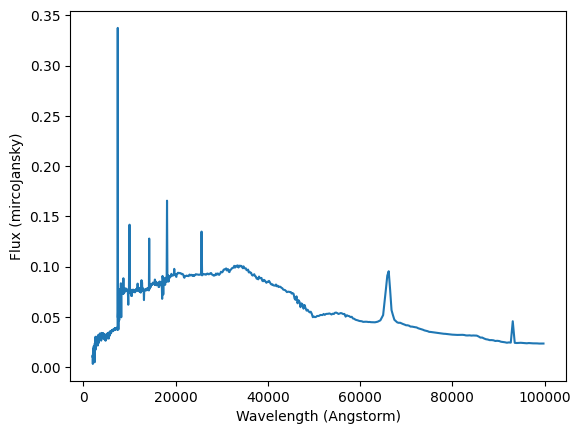

In [9]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[0].values])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

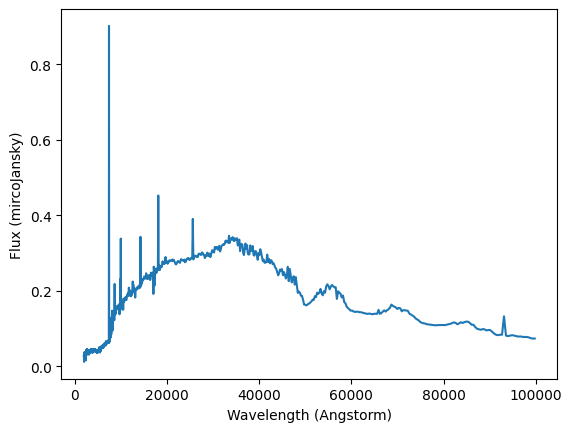

In [10]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[100].values])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

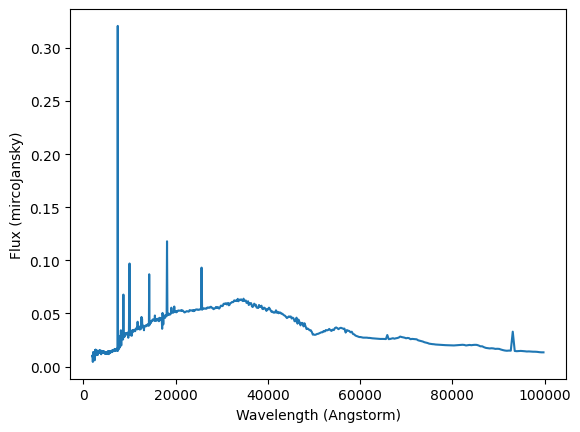

In [11]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[10].values])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

In [12]:
stellarModelValues = []
dustModelValues = []
ageModelValues = []
tauModelValues = []

## Create a model to predict the total amount of mass in stars with a galaxy based on a spectra

In [13]:
# Training and testing a Linear Regression model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == "neg_mean_squared_error":
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9999999999997491 

Test Score:  -3782257.4624982835 

r2 mean cross validate score: -984068.2490084268 

neg_mean_squared_error mean cross validate score: -509788.6136878375 

neg_root_mean_squared_error mean cross validate score: -552.0529128698033 

neg_mean_absolute_error mean cross validate score: -69.19904360879562 



In [14]:
# Training and testing a SVR model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == "neg_mean_squared_error":
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.8558787786364146 

Test Score:  0.854183485782114 

r2 mean cross validate score: 0.8345631639751142 

neg_mean_squared_error mean cross validate score: -0.08567050899377684 

neg_root_mean_squared_error mean cross validate score: -0.2923644282272101 

neg_mean_absolute_error mean cross validate score: -0.22108598838885007 



In [15]:
# Training and testing a SGDRegressor model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == "neg_mean_squared_error":
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  -8.683412757362485e+26 

Test Score:  -2.4498768570247514e+27 

r2 mean cross validate score: -2.357665078400091e+26 

neg_mean_squared_error mean cross validate score: -1.2479054642288759e+26 

neg_root_mean_squared_error mean cross validate score: -10722133087744.629 

neg_mean_absolute_error mean cross validate score: -2796060592755.112 



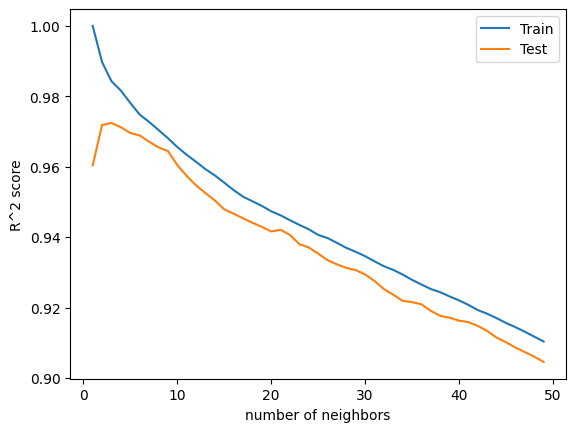

In [16]:
# Finding the best n_neighbors for a KNN model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 3. To give our model to best score possible we use 3 for the n_neighbors hyperparameter.

In [17]:
# Training and testing a KNN model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == "neg_mean_squared_error":
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9842882044740907 

Test Score:  0.9724207903540447 

r2 mean cross validate score: 0.968390769603652 

neg_mean_squared_error mean cross validate score: -0.016447259353576864 

neg_root_mean_squared_error mean cross validate score: -0.1279022989682964 

neg_mean_absolute_error mean cross validate score: -0.09211693453101126 



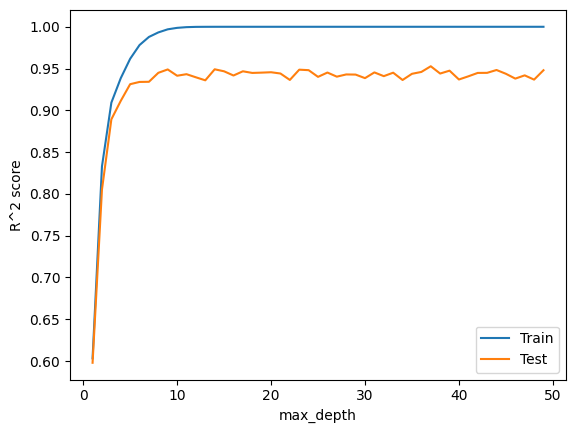

In [18]:
# Finding the best max_depth for Decision Tree model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is near 10. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [19]:
# Training and testing a Decision Tree model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=11)
cv_scores = cross_validate(dt, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == "neg_mean_squared_error":
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9995618962510272 

Test Score:  0.9407018298754489 

r2 mean cross validate score: 0.9478292442026242 

neg_mean_squared_error mean cross validate score: -0.02685423454284319 

neg_root_mean_squared_error mean cross validate score: -0.16366221072450435 

neg_mean_absolute_error mean cross validate score: -0.11150225778424643 



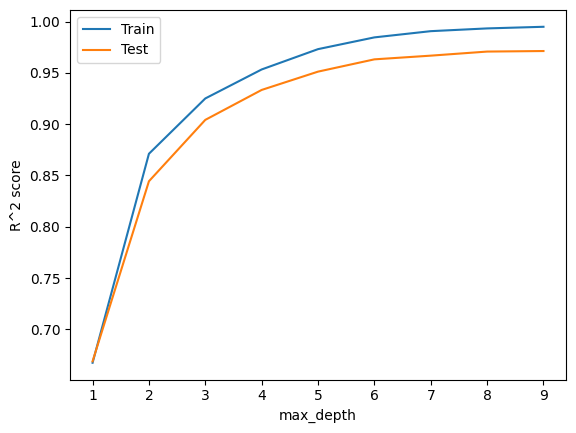

In [20]:
# Finding the best max_depth for Random Forest model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,10):
    rf = RandomForestRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,10), values1, label='Train')
plt.plot(range(1,10), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model, we see that the best model occurs when the max depth is around 9. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [21]:
# Training and testing a Random Forest model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
cv_scores = cross_validate(rf, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == "neg_mean_squared_error":
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9953107613966578 

Test Score:  0.9722160757328454 

r2 mean cross validate score: 0.9717134176118337 

neg_mean_squared_error mean cross validate score: -0.014644534315130738 

neg_root_mean_squared_error mean cross validate score: -0.12088032251260805 

neg_mean_absolute_error mean cross validate score: -0.08007599023635582 



<BarContainer object of 5 artists>

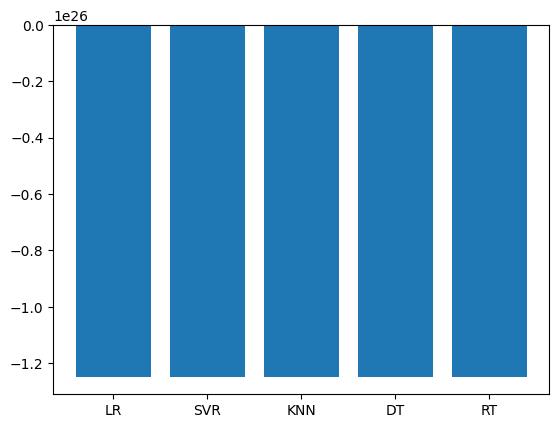

In [22]:
a = stellarModelValues.pop(2)
plt.bar(["LR", "SVR", "KNN", "DT", "RT"], a)

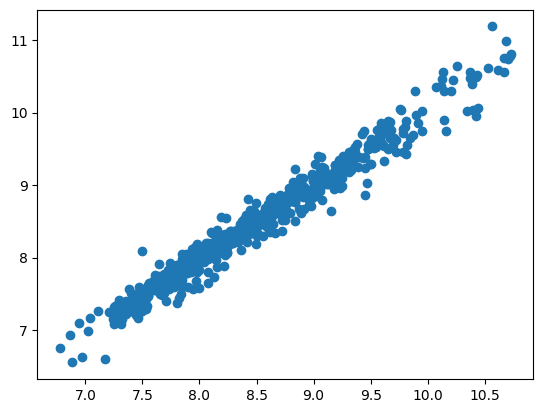

In [28]:
stellar_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X, stellarMass_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))

plt.scatter(stellar_pred, stellarMass_values)

### Stellar Mass Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-1.2479054642288759e+26 ` and our best was `Random Forest` model with a Negative Mean Squared Error of `-0.014644534315130738`. Since the best model's Negative Mean Squared Error is very close to 0, the opportunity cost to get it 0 is not worth our time since our model is already good. If we want to improve our model, maybe feature reduction will get us even closer to 0.

## Create a model to predict the amount of cosmic dust in a galaxy based on a spectra

In [ ]:
# Training and training a Linear Regression model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Training and testing SVR model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Training SGDRegressor model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best n_neighbors for a KNN model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 3. To give our model to best score possible we use 3 for the n_neighbors hyperparameter.

In [ ]:
# Training and testing KNN model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best max_depth for a Decision Tree model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is near 15. To give our model to best score possible we use 15 for the max_depth hyperparameter.

In [ ]:
# Training amd testing a Decision Tree model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=15, random_state=42)
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=15, random_state=42)
cv_scores = cross_validate(dt, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best max_depth for a Random Forest model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model, we see that the best model occurs when the max depth is around 10. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [ ]:
# Training and testing a Random Forest model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
cv_scores = cross_validate(rf, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X[:100*x], dust_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=10).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths. This means the model doesn't have high bias or higher variance. Maybe features would help improve the model but very marginally. We will test that.

In [ ]:
# Plotting the explained variances
pca = PCA()
pca.fit(X)
threshold = 0.01

features = range(5,25)
plt.bar(features, pca.explained_variance_[5:25])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.legend()
plt.show()

In [25]:
# Preforming dimension reduction with PCA
pca = PCA(n_components=12)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(1000, 12)

Reduces the number of features to 12

In [ ]:
# Finding the best max_depth for Random Forest for dust_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 10. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [26]:
# Training and testing a Random Forest model for dust_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, dust_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
cv_scores = cross_validate(rf, X_pca, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9836975589597141 

Test Score:  0.8211127107933827 

r2 mean cross validate score: 0.8765844401186873 

neg_mean_squared_error mean cross validate score: -0.015518444669111467 

neg_root_mean_squared_error mean cross validate score: -0.12046358107046082 

neg_mean_absolute_error mean cross validate score: -0.053606438268882096 



In [ ]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], dust_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=10).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

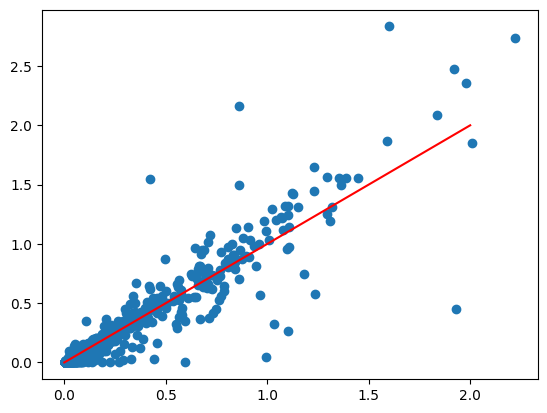

In [43]:
dust_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X, dust_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))

plt.scatter(dust_pred, dust_values)
plt.plot(range(0, 3),range(0,3), color="red")
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths. This means the model doesn't have high bias or higher variance.

### Dust Mass Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-4.566952920071573e+27` and our best was `Random Forest` model with a Negative Mean Squared Error of `-0.016129906081161306`. Based on the fourth graph for this section, our best model has neither high bias or high variance and seems the train R^2 and test R^2 score are going converge to converge give more data. Since the scores seem to converge from a point where high variance is reason conclusion, the Negative Mean Squared Error may improve after preforming feature reduction with Principal Component Analysis (PCA). After performing PCA, the best `Random Forest` model has a Negative Mean Squared Error of `-0.015518444669111467 `. This result is to be expected since our original best `Random Forest` model was potential converting. 

## Create a model to predict how long ago did the galaxy form its first stars based on a spectra

In [ ]:
# Training and testing a Linear Regression model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Training and testing a SVR model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Training and testing a SGDRegressor model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best n_neighbors for KNN for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 3. To give our model to best score possible we use 3 for the n_neighbors hyperparameter. After try different values like 7 we got better score. This means we should be using another metric for the graph above.

In [ ]:
# Training and testing a KNN model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
#Finding the best max_depth for Decision Tree for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is near 13. To give our model to best score possible we use 13 for the max_depth hyperparameter. After try different values like 3 we got better score. This means we should be using another metric for the graph above.

In [ ]:
# Training and testing a Decision Tree model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=13)
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=13)
cv_scores = cross_validate(dt, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best max_depth for Random Forest for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,10):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,10), values1, label='Train')
plt.plot(range(1,10), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 9. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [ ]:
# Training and testing a Random Forest model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
cv_scores = cross_validate(rf, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], age_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=10).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths. There is seems to be a pattern of high variance through out the graph. Since there is high variance, we can reduced the number of features to improve our model.

In [ ]:
# Preforming dimension reduction with PCA
pca = PCA(n_components=12)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

Reduces the number of features to 12

In [ ]:
# Finding the best max_depth for a RandomForest model for age_values with reduced features with PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 15. To give our model to best score possible we use 15 for the max_depth hyperparameter.

In [ ]:
# Training and testing a Random Forest model for age_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, age_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
cv_scores = cross_validate(rf, X_pca, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

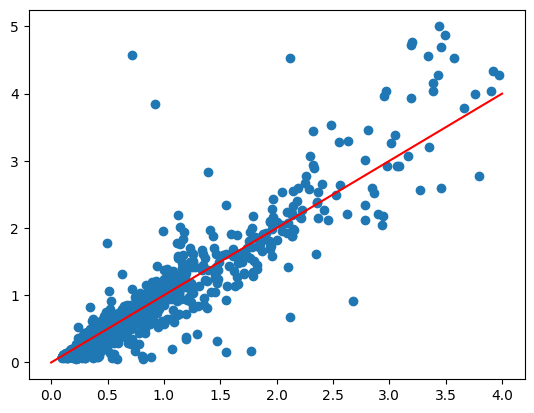

In [42]:
age_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X_pca, age_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))

plt.scatter(age_pred, age_values)
plt.plot(range(0, 5),range(0,5), color="red")
plt.show()

In [ ]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], age_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=15).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths.

### Age Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-1.1376371168928233e+27` and our best was `Random Forest` model with a Negative Mean Squared Error of `-0.38647295413082794`. Based on the fourth graph for this section, our best model has neither high bias or high variance and seems the train R^2 and test R^2 score are going converge to converge give more data. Since the scores seem to converge from a point where high variance is reason conclusion, the Negative Mean Squared Error may improve after preforming feature reduction with Principal Component Analysis (PCA). After performing PCA, the best `Random Forest` model has a Negative Mean Squared Error of `-0.10636562838975434`.

## Create a model to predict the speed of the process of star formation proceeds based on a spectra

In [ ]:
# Training and testing a  Linear Regression model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Training and training a SVR model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Training and training a SGDRegressor model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best n_neighbors for a KNN model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 19. To give our model to best score possible we use 19 for the n_neighbors hyperparameter. After try different values like 3 we got better score. This means we should be using another metric for the graph above.

In [ ]:
# Training and testing a KNN model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best max_depth for Decision Tree for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is 0. To give our model to best score possible we let the model decide.

In [ ]:
# Training and testing a Decision Tree model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor()
cv_scores = cross_validate(dt, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding the best max_depth for a Random Forest for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,10):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,10), values1, label='Train')
plt.plot(range(1,10), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 9. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [ ]:
# Training and testing a Random Forest model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42)
cv_scores = cross_validate(rf, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")


In [ ]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X[:100*x], tau_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=15).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above we see high variance so we should reduce the number of features in our model

In [ ]:
# Plotting the explained variances
pca = PCA()
pca.fit(X)
threshold = 0.01

features = range(5,25)
plt.bar(features, pca.explained_variance_[5:25])
plt.axhline(y=threshold, color='r', linestyle='-', label=f"threshold:{threshold}")
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.legend()
plt.show()

In [ ]:
# Preform dimension reduction with PCA
pca = PCA(n_components=12)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

Reduces the number of features to 12

In [ ]:
# Finding the best max_depth for a Random Forest model for tau_values and PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 18. To give our model to best score possible we use 18 for the max_depth hyperparameter.

In [ ]:
#Training and testing a Random Forest model for tau_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, tau_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=18)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=18)
cv_scores = cross_validate(rf, X_pca, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [ ]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], tau_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=15).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we still see high variance with our model so are gonna to scaled the tau values by log and test the scaled data with our model

In [31]:
# Transforming tau to Log(tau)

log_tau_values = np.log(tau_values)
#log_tau_values

In [ ]:
# Finding the best max_depth for a Random Forest model for scaled tau_values and PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, log_tau_values,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

In [ ]:
# Training and testing a Random Forest model for scaled tau_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, log_tau_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=19)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=19)
cv_scores = cross_validate(rf, X_pca, log_tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

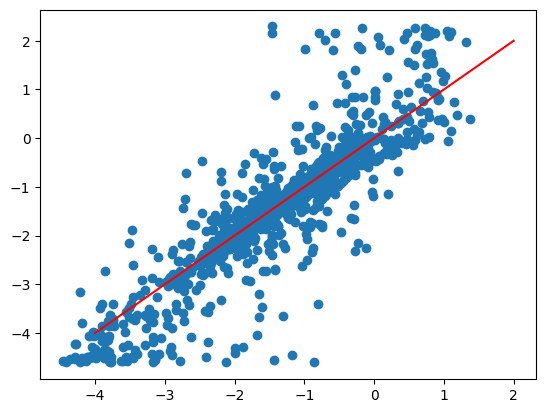

In [39]:
tau_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X_pca, log_tau_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))

plt.scatter(tau_pred, log_tau_values)
plt.plot(range(-4, 3),range(-4,3), color="red")
plt.show()

### Tau Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-5.7153758997874875e+25` and our best was `Random Forest` model with a Negative Mean Squared Error of `-1.8307158614870567`. Based on the fourth graph for this section, our best model has high variance. Since our model have high variance, the Negative Mean Squared Error may improve after preforming feature reduction with Principal Component Analysis (PCA). After performing PCA, the best `Random Forest` model has a Negative Mean Squared Error of `-1.3135592776995137 `. After graphing the training R^2 and test R^2 score with the model that was trained with reduced data, we still saw high variance. Since we had variance we scaled the tau values by log and train another model that was using the scaled data and reduced features and we got a Negative Mean Squared Error of `-0.45769978833171265 `. It should be noted that when comparing models that are and aren't scaled isn't a 1 to 1 comparison.

## Results

For our four models that are targeting Stellar Mass, Dust, Age, and Tau, the best models came from Random Forest model. Their Negative Mean Squared Error were  `-0.014644534315130738`, `-0.015518444669111467`, `-0.10636562838975434`, and `-0.45769978833171265` respectively. 

For the Stellar Mass model, there was no need for improvement as the opportunity cost to get to a Negative Mean Squared Error to 0 would not be worth it. 

For the Dust model, if all 850 features were used a Random Forest would get a Negative Mean Squared Error of `-0.016129906081161306` and if only the Intrinsic dimension where the threshold is 0.01 was used a Random Forest would get a Negative Mean Squared Error of `-0.015518444669111467`. 

For the Age model, if all 850 features were used a Random Forest would get a Negative Mean Squared Error of `-0.38647295413082794` and if only the Intrinsic dimension where the threshold is 0.01 was used a Random Forest would get a Negative Mean Squared Error of `-0.10636562838975434`. 

For the Tau model, if all 850 features were used a Random Forest would get a Negative Mean Squared Error of `-1.8307158614870567` and if only the Intrinsic dimension where the threshold is 0.01 was used a Random Forest would get a Negative Mean Squared Error of `-1.3135592776995137`. if only the Intrinsic dimension where the threshold is 0.01 and the tau values were scaled by log was used a Random Forest would get a Negative Mean Squared Error of `-0.45769978833171265`.